# Introduction

Hello! My name is Renan. I'm Brazilian and I live in Rio de Janeiro.

This dataset made me wonder how some of the independent variables are related to the rental prices in my city. That said, i am going to limit the analysis to the city of Rio de Janeiro.

So, I'm going to perform some Exploratory Data Analysis and also some Multiple Linear Regression Analysis using the Ordinary Least Squares method. By doing this, we are going to try to explain how the dataset features impact the rental prices.

I am considering the categorical variables, such as if the apartment has furniture or not, as dummy variables.

The model: 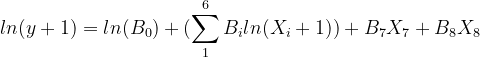


In which variables X1 - X6 are the continuos variables, and X7 and X8 are the dummies.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import statsmodels.api as sm
from scipy.stats import shapiro
%matplotlib inline

In [2]:
houses = pd.read_csv("../input/brasilian-houses-to-rent/houses_to_rent_v2.csv")

In [3]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [4]:
houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
houses.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [6]:
houses['city'].unique() ### No problem on cities names.

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [7]:
rio = houses[houses['city'] == "Rio de Janeiro"]

In [8]:
rio['animal'].unique()   ## Boolean variable, so we are going to transform this text variable into a dummy variable

array(['acept', 'not acept'], dtype=object)

In [9]:
rio.loc[:,'animal'] = rio['animal'].apply(lambda x: 1 if x == 'acept' else 0) # if 1 -> place accepts animals.

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [10]:
rio.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
6,Rio de Janeiro,72,2,1,0,7,1,not furnished,740,1900,85,25,2750
9,Rio de Janeiro,35,1,1,0,2,1,furnished,590,2300,35,30,2955
17,Rio de Janeiro,88,2,3,1,9,0,furnished,1614,3500,221,16,5351
18,Rio de Janeiro,56,2,1,0,8,1,not furnished,800,1220,0,16,2036
24,Rio de Janeiro,90,3,2,1,7,1,not furnished,800,1800,118,24,2742


In [11]:
rio.loc[:, 'furniture'].unique()   # Same happens.That said we can make that column a dummy variable. 
                                   # 1 is going to represent furnished places. 

array(['not furnished', 'furnished'], dtype=object)

In [12]:
rio.loc[:, 'furniture'] = rio['furniture'].apply(lambda x: 1 if x == 'furnished' else 0)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [13]:
rio.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
6,Rio de Janeiro,72,2,1,0,7,1,0,740,1900,85,25,2750
9,Rio de Janeiro,35,1,1,0,2,1,1,590,2300,35,30,2955
17,Rio de Janeiro,88,2,3,1,9,0,1,1614,3500,221,16,5351
18,Rio de Janeiro,56,2,1,0,8,1,0,800,1220,0,16,2036
24,Rio de Janeiro,90,3,2,1,7,1,0,800,1800,118,24,2742


In [14]:
rio['floor'].unique() # We need to deal with the '-' value.

array(['7', '2', '9', '8', '10', '6', '5', '20', '1', '24', '4', '-', '3',
       '11', '18', '13', '17', '12', '14', '16', '22', '15', '21', '25',
       '19'], dtype=object)

In [15]:
rio['floor'].value_counts() # We still get a lot of data points if we drop those rows in which we have the
                            # "-" value for the floor variable, so we might as well drop them.

2     210
3     170
4     150
5     137
1     137
-     107
7     102
8      97
6      84
10     78
9      66
11     53
12     41
14     17
13     17
15      9
16      6
21      5
17      4
20      3
18      3
19      2
25      1
22      1
24      1
Name: floor, dtype: int64

In [16]:
bye = rio[rio['floor'] == "-"].index ## Getting the indexes of the rows which have the value "-" for the floor variable

In [17]:
rio = rio.drop(bye)

In [18]:
rio['floor'] = rio['floor'].apply(lambda x: int(x))

In [19]:
rio.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
6,Rio de Janeiro,72,2,1,0,7,1,0,740,1900,85,25,2750
9,Rio de Janeiro,35,1,1,0,2,1,1,590,2300,35,30,2955
17,Rio de Janeiro,88,2,3,1,9,0,1,1614,3500,221,16,5351
18,Rio de Janeiro,56,2,1,0,8,1,0,800,1220,0,16,2036
24,Rio de Janeiro,90,3,2,1,7,1,0,800,1800,118,24,2742


In [20]:
rio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394 entries, 6 to 10690
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 1394 non-null   object
 1   area                 1394 non-null   int64 
 2   rooms                1394 non-null   int64 
 3   bathroom             1394 non-null   int64 
 4   parking spaces       1394 non-null   int64 
 5   floor                1394 non-null   int64 
 6   animal               1394 non-null   int64 
 7   furniture            1394 non-null   int64 
 8   hoa (R$)             1394 non-null   int64 
 9   rent amount (R$)     1394 non-null   int64 
 10  property tax (R$)    1394 non-null   int64 
 11  fire insurance (R$)  1394 non-null   int64 
 12  total (R$)           1394 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 152.5+ KB


In [21]:
rio = rio.drop(axis = 1, columns = ['property tax (R$)', 'total (R$)', 'hoa (R$)', 'fire insurance (R$)'])

# Exploratory Data Analysis (EDA)

We are going to begin the analysis doing some EDA, just to take a look at our data, and see what is going on, what are the correlations between variables, and check for possible multicolinearity.

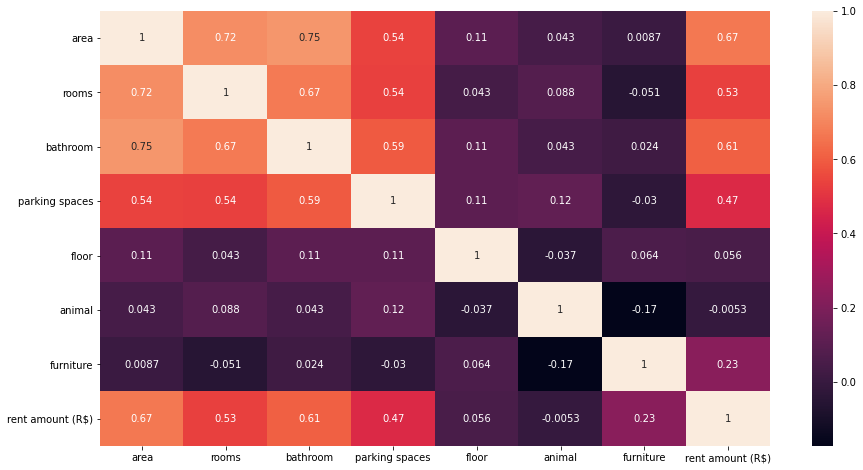

In [22]:
plt.figure(figsize = (15,8))
sns.heatmap(rio.corr(), annot = True) ## Floor and animal variables seems not quite related to anything

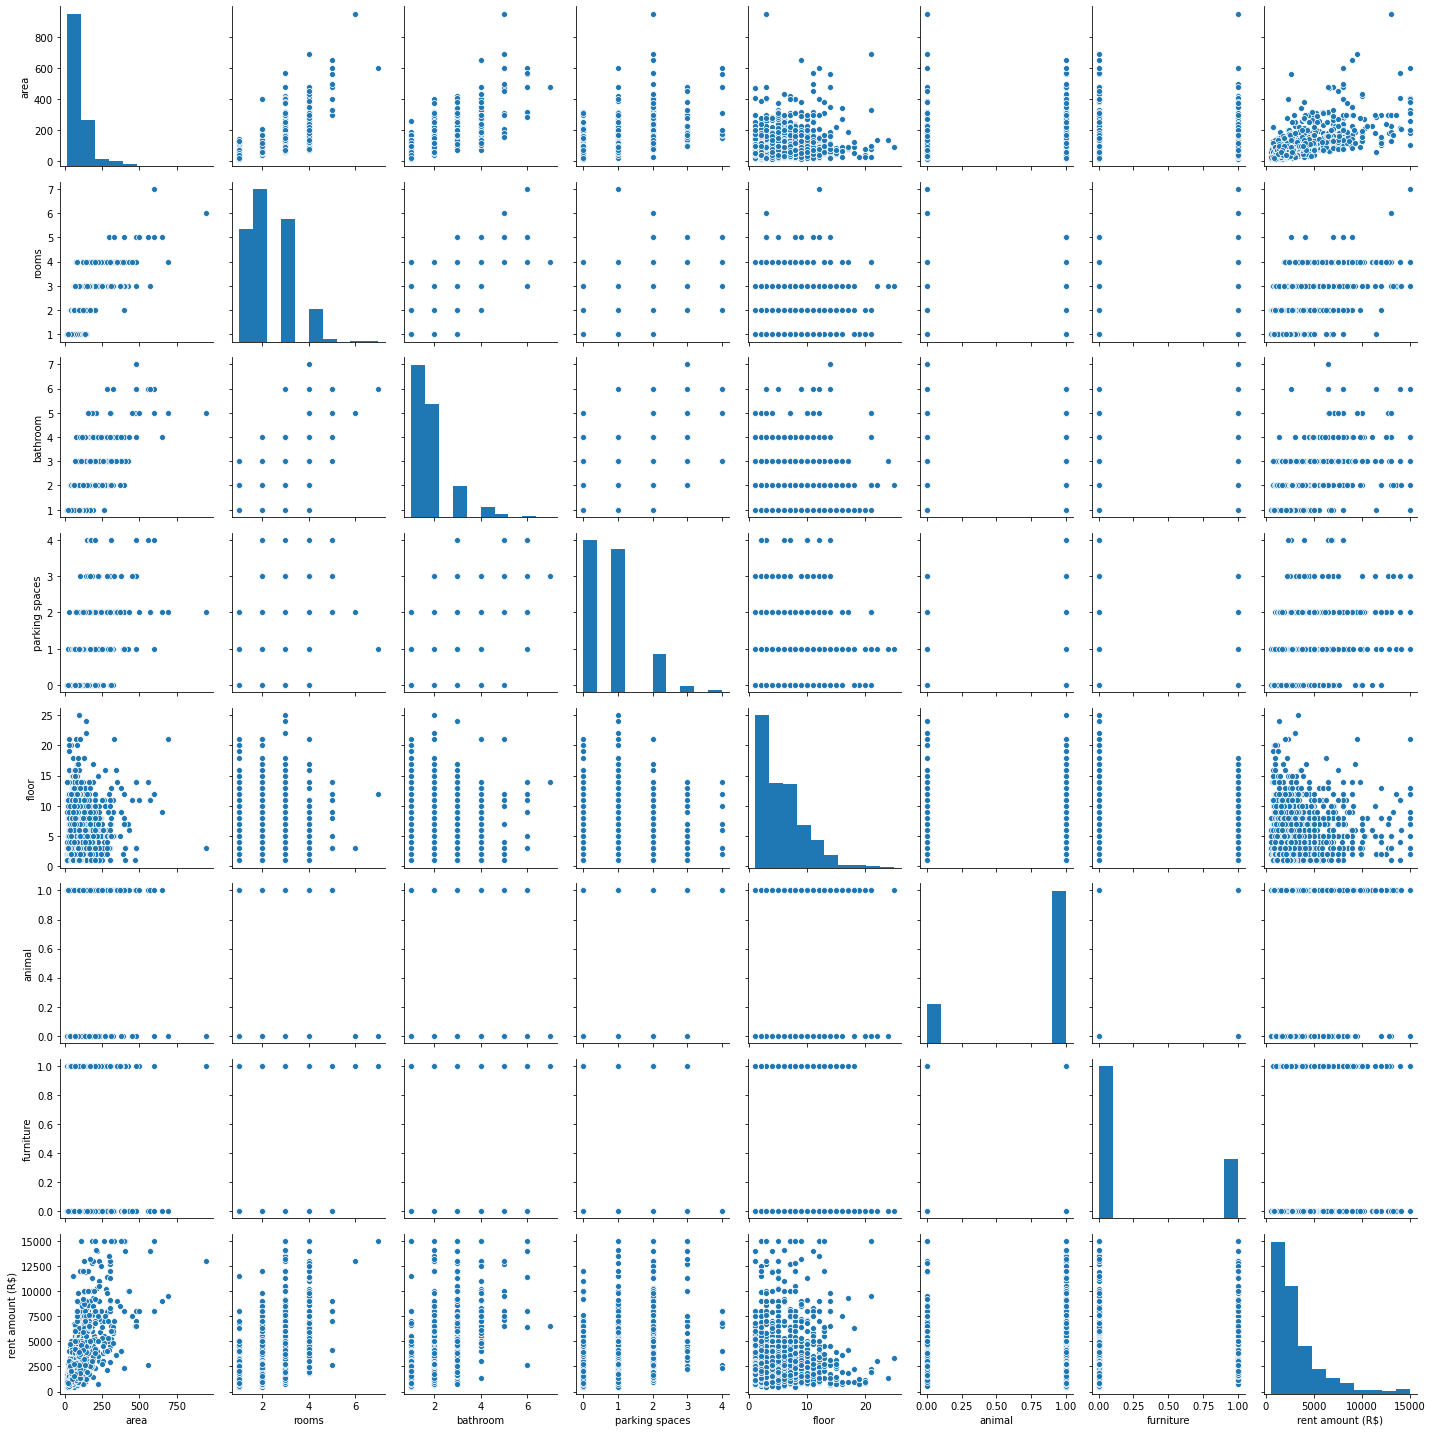

In [23]:
sns.pairplot(rio)
plt.tight_layout()

We can see that some of the distributions are positive skewed, so we are going to use the Log transformation to reduce the high leverage values impact, and possible future problems with heterocedasticity.

In fact, for the model, we are going to use the x = log(x+1) transformation, since the parking spaces 
variable assume 0 values, and the log of 0 is not defined.

That said, our model will be a log-log linear model.

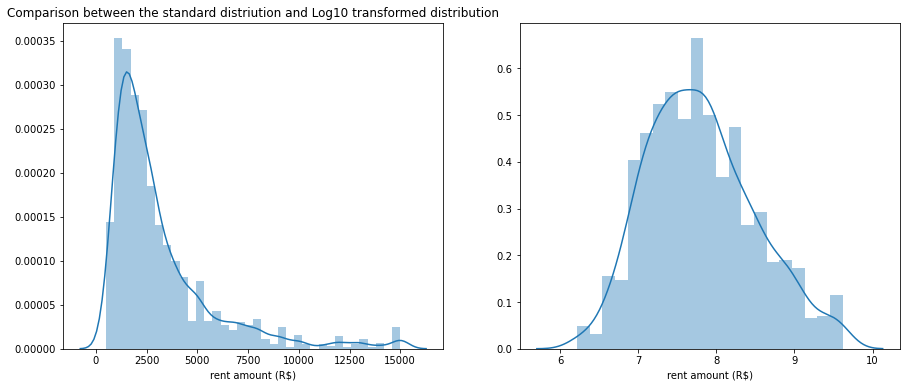

In [24]:
plt.figure(figsize = (15,6))


plt.subplot(1, 2, 1)
plt.title("Comparison between the standard distriution and Log10 transformed distribution")
sns.distplot(a = rio['rent amount (R$)'])

plt.subplot(1, 2, 2)
sns.distplot(a = np.log(rio['rent amount (R$)']+1))   



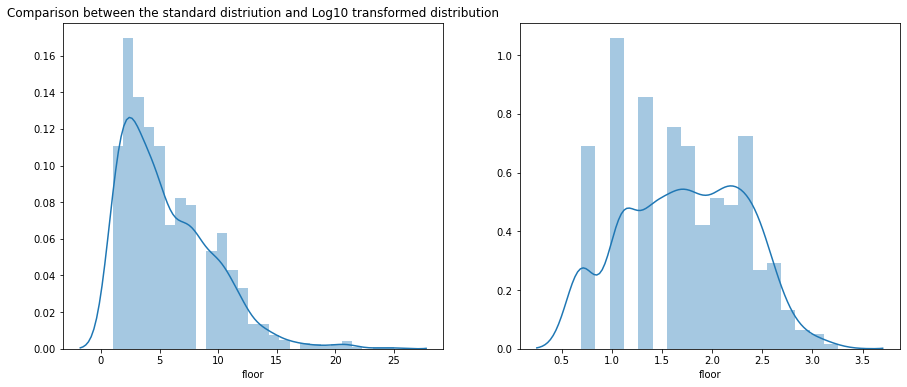

In [25]:
plt.figure(figsize = (15,6))


plt.subplot(1, 2, 1)
plt.title("Comparison between the standard distriution and Log10 transformed distribution")
sns.distplot(a = rio['floor'])

plt.subplot(1, 2, 2)
sns.distplot(a = np.log(rio['floor']+1))

In [26]:
newOrder = ['city','area','rooms','bathroom','parking spaces','floor','rent amount (R$)', 'furniture', 'animal']
rio = rio[newOrder]
rio = rio.drop(labels = 'city', axis = 1)
rio.head()     #Changing order of columns in order to separate continous variables and dummy variables

,area,rooms,bathroom,parking spaces,floor,rent amount (R$),furniture,animal
6,72,2,1,0,7,1900,0,1
9,35,1,1,0,2,2300,1,1
17,88,2,3,1,9,3500,1,0
18,56,2,1,0,8,1220,0,1
24,90,3,2,1,7,1800,0,1


In [27]:
rioCont, rioDummy = rio.loc[:, 'area':'rent amount (R$)'], rio.loc[:, 'furniture':'animal'] 

In [28]:
rioCont = np.log(rioCont + 1)

In [29]:
newRio = pd.concat([rioCont, rioDummy], axis = 1, join = 'inner')
newRio.head()

,area,rooms,bathroom,parking spaces,floor,rent amount (R$),furniture,animal
6,4.290459,1.098612,0.693147,0.000000,2.079442,7.550135,0,1
9,3.583519,0.693147,0.693147,0.000000,1.098612,7.741099,1,1
17,4.488636,1.098612,1.386294,0.693147,2.302585,8.160804,1,0
18,4.043051,1.098612,0.693147,0.000000,2.197225,7.107425,0,1
24,4.510860,1.386294,1.098612,0.693147,2.079442,7.496097,0,1


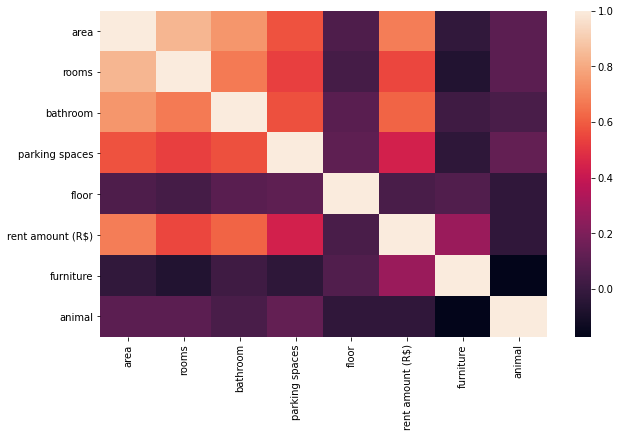

In [30]:
plt.figure(figsize = (10,6))
sns.heatmap(newRio.corr())

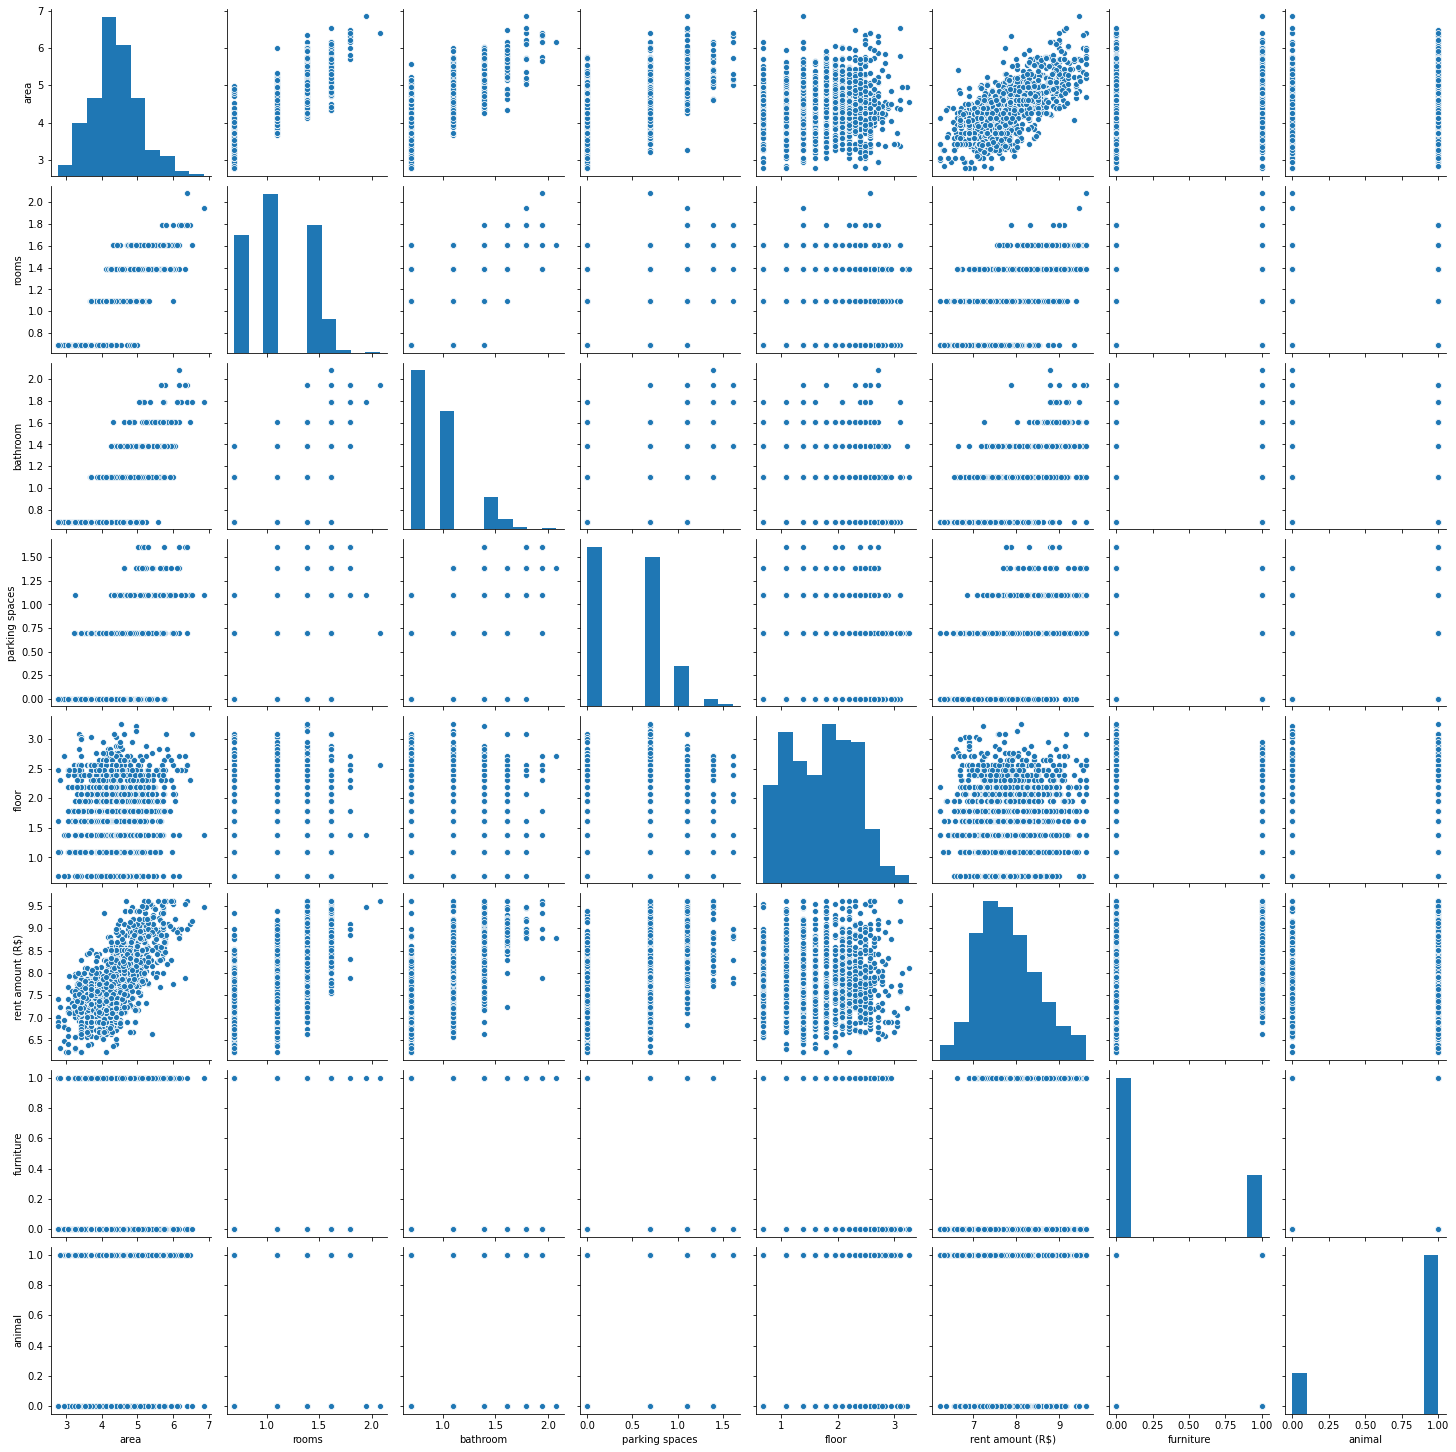

In [31]:
sns.pairplot(newRio)

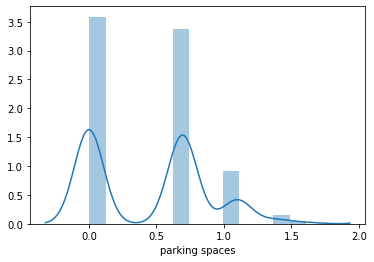

In [32]:
sns.distplot(a = newRio['parking spaces'])  #Parking spaces is still messed up =( 

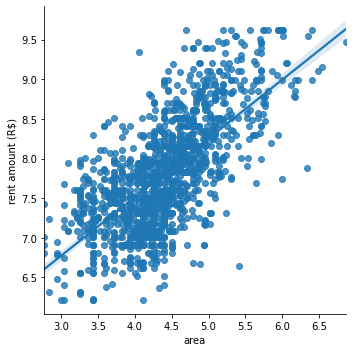

In [33]:
sns.lmplot(data = newRio, x = 'area', y = 'rent amount (R$)')  # Data suggests strong linear relation between the rent values and the area

# Checking for multicolinearity

In order to look for annoying multicolinearity in our data, we are going to take a look on the Variance Inflation Factor (VIF), which is really nothing fancy. The VIF is just an statistic generated from the R squared value of the linear regression of the independent variable we are checking for multicolinearity onto the remaining independent variables. 

Usual VIF thresholds are 5 or 10 (HASTIE et al, 2013). If we have values greater than those, we should deal with multicolinearity, even discarding the said variable, or mixing it with other independent variables and creating a new indicator. For more reading on the VIF: https://en.wikipedia.org/wiki/Variance_inflation_factor

In [34]:
# First we create a simple function for getting the VIFs for each feature of the dataset

def vif(dataframe, add_intercept = True):
    if add_intercept == True:
        dataframe = sm.add_constant(dataframe)
        
    for i in dataframe.columns:
        y = dataframe[[i]]
        x = dataframe.drop(labels = i, axis = 1)
        model = sm.OLS(y, x)
        results = model.fit()
        rSquared = results.rsquared
        vifValue = round(1/(1 - rSquared), 2)

        print('---------------------------------------------------------------------------------------------')
        print("The regression of the independent variable ", str.upper(i), " returns a R squared value of: ", rSquared)
        print('\nThat said, the VIF for this variable is: ', vifValue)
        

In [35]:
vif(rio)   # VIFs are low, so we can assume that multicolinearity is not a problem (we can ignore the constant VIF).

---------------------------------------------------------------------------------------------
The regression of the independent variable  CONST  returns a R squared value of:  0.930856410918572

That said, the VIF for this variable is:  14.46
---------------------------------------------------------------------------------------------
The regression of the independent variable  AREA  returns a R squared value of:  0.6920857742936313

That said, the VIF for this variable is:  3.25
---------------------------------------------------------------------------------------------
The regression of the independent variable  ROOMS  returns a R squared value of:  0.5813343434490881

That said, the VIF for this variable is:  2.39
---------------------------------------------------------------------------------------------
The regression of the independent variable  BATHROOM  returns a R squared value of:  0.6405600614538802

That said, the VIF for this variable is:  2.78
--------------------------

# Model Estimation

In order to adjust the skewness in the dependent variable and in some of the independent variables, we are going to use the log-log linear model for the Linear Regression, but keeping the dummy variables in the regular form (because we can't take the log of 0, and log 1 = 0).

Also, our parking places variable takes 0 values, so our transformation actually is going to be: Bi * Xi => Bi* Ln * (Xi + 1) 

That said, our transformed linear regression model is: Ln(y+1) = Ln (B0 + 1) + B1Ln(x+1) + B2Ln(x+1) + ... + B7X7 + B8X8  -> Last two variables are the dummy ones.

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
list(newRio.columns)

newCols = ['area',
 'rooms',
 'bathroom',
 'parking spaces',
 'floor',
 'furniture',
 'animal','rent amount (R$)']

newRio = newRio[newCols]
newRio.head()                  #Changing order of cols to put rent value in the end

,area,rooms,bathroom,parking spaces,floor,furniture,animal,rent amount (R$)
6,4.290459,1.098612,0.693147,0.000000,2.079442,0,1,7.550135
9,3.583519,0.693147,0.693147,0.000000,1.098612,1,1,7.741099
17,4.488636,1.098612,1.386294,0.693147,2.302585,1,0,8.160804
18,4.043051,1.098612,0.693147,0.000000,2.197225,0,1,7.107425
24,4.510860,1.386294,1.098612,0.693147,2.079442,0,1,7.496097


In [38]:
X = newRio.loc[:, 'area':'animal']
y = newRio['rent amount (R$)']

print(X.head())
print(y.head())

        area     rooms  bathroom  parking spaces     floor  furniture  animal
6   4.290459  1.098612  0.693147        0.000000  2.079442          0       1
9   3.583519  0.693147  0.693147        0.000000  1.098612          1       1
17  4.488636  1.098612  1.386294        0.693147  2.302585          1       0
18  4.043051  1.098612  0.693147        0.000000  2.197225          0       1
24  4.510860  1.386294  1.098612        0.693147  2.079442          0       1
6     7.550135
9     7.741099
17    8.160804
18    7.107425
24    7.496097
Name: rent amount (R$), dtype: float64


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [40]:
import statsmodels.api as sm       # Statsmodels for the regression summary

Here we are going to use the function sm.add_constant in order to add a column of 1s in the dataset. That is necessary for fitting a linear model with intercept in statsmodels. For more details check the documentation for the sm.OLS function on their website:

https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLS.html

In [41]:
X_constant = sm.add_constant(X_train) 

In [42]:
model = sm.OLS(y_train, X_constant).fit()
predictions = model.predict(X_constant) 

In [43]:
print_model = model.summary()    
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       rent amount (R$)   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     186.3
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          1.91e-174
Time:                        17:02:05   Log-Likelihood:                -605.33
No. Observations:                 975   AIC:                             1227.
Df Residuals:                     967   BIC:                             1266.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.9094      0.133     36.

For a confidence of 5%, the "parking spaces" variable isn't statistically relevant (p-value of 18,6%), so, we are dropping it.

In [44]:
X_constant = X_constant.drop(['parking spaces'], axis = 1) 

In [45]:
model = sm.OLS(y_train, X_constant).fit()
predictions = model.predict(X_constant) 
print_model = model.summary()    
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       rent amount (R$)   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     216.9
Date:                Wed, 24 Jun 2020   Prob (F-statistic):          2.98e-175
Time:                        17:02:05   Log-Likelihood:                -606.21
No. Observations:                 975   AIC:                             1226.
Df Residuals:                     968   BIC:                             1261.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8470      0.125     38.900      0.0

# Checking for Serial correlation and Normality of residuals

Text(0.5, 0, 'fitted values')

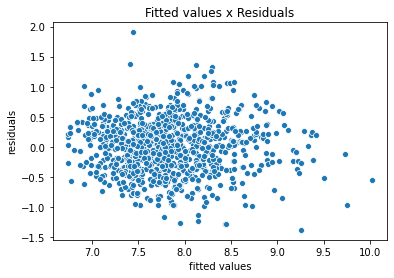

In [46]:
#Evaluating Serial Autocorrelation
residuals = y_train - predictions
sns.scatterplot(x = predictions, y = residuals)
plt.title("Fitted values x Residuals")
plt.ylabel("residuals")
plt.xlabel("fitted values")

#Residuals seem random, no signs of autocorrelation.

Text(0.5, 0, 'Residuals')

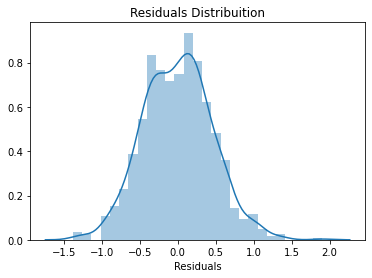

In [47]:
#Evaluating residuals distribution
sns.distplot(residuals)
plt.title("Residuals Distribuition")
plt.xlabel("Residuals")

# Distribution seems roughly normal, so we are fine.

# Evaluating the model

For evaluating the prediction capabilities of the model, we are going to use the train_test_split process. This method consists in dividing the available data in two parts: The training data and the test data.

The training data is the one we are going to use to estimate the parameters and fit our model. We should do that in order to have a set of data available for testing the model after its development, so we can check if our model's prediction capacity is good only because it's biased to our data.

That said, the test data is the one we are using for actually testing the model's prediction capability to a new set of data. That's the performance we should expect after testing the model on new real world data.

Besides that, we are going to build some statistics in order to evaluate the model's precision and accuracy. Since we have many lines (n > 1000), we are using a ratio between the Root-mean squared error (RMSE) and the mean of the predicted values to estimate how off our fitted values are from the real data, on average.

So the ratio formula is: ratio = RMSE / mean(y_test)

In [48]:
X_test_no_parking = X_test.drop(axis = 1, labels = 'parking spaces')

In [49]:
X_test_no_parking_constant = sm.add_constant(X_test_no_parking)

In [50]:
forecasting = model.predict(X_test_no_parking_constant)
forecasting

3799     7.256285
1246     7.449023
6874     7.569794
495      7.838140
7593     8.378022
           ...   
2186     7.623232
2473     7.647057
4328     8.015619
10022    6.899502
1123     7.973526
Length: 419, dtype: float64

In [51]:
test_residuals = y_test - forecasting

In [52]:
RSS = sum((test_residuals)**2)   #Residual Sum of Squares
TSS = sum((y_test - y_test.mean())**2)   #Total Sum of Squares
rSquared = (TSS - RSS)/TSS
RMSE = np.sqrt(RSS/len(test_residuals))
ratio = RMSE/y_test.mean()

print("The Residual Sum of Squares: ", RSS)
print("The total sum of squares: ", TSS)
print("The R squared: ", rSquared)
print("The Root-mean squared error: ", RMSE)
print("The ratio between the RMSE and the mean of the test data (y_test.mean()): ", round(ratio,4))

The Residual Sum of Squares:  89.18529141712861
The total sum of squares:  208.19015616910065
The R squared:  0.5716161942609398
The Root-mean squared error:  0.46135964728819934
The ratio between the RMSE and the mean of the test data (y_test.mean()):  0.0593


Models seems pretty good. We have a R squared of ~ 57%, that means, amongst the total variability of the output variable, the variance explained by the model correspond to 57% of the total.

Besides, our ratio is roughly 6%. We can interpret that as: If we are using our model to predict the rental prices, our predictions will be, on average, off by 6% of the real data.

# Forecasting

For a quick example of predicting new data, i'll select a row of the test data and check our predictions for that, and the confidence intervals of our predictions.

We could do the same process for new data that appears.

In [53]:
X_test_no_parking_constant.loc[495,:]

const        1.000000
area         4.510860
rooms        1.098612
bathroom     1.098612
floor        1.791759
furniture    0.000000
animal       1.000000
Name: 495, dtype: float64

In [54]:
guess = model.get_prediction(X_test_no_parking_constant.loc[495,:])

In [55]:
guess.summary_frame(alpha = 0.05)  #setting the value for alpha. Our confidence interval will be of 95%

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
const,7.83814,0.021429,7.796087,7.880193,6.949691,8.726588
area,7.83814,0.021429,7.796087,7.880193,6.949691,8.726588
rooms,7.83814,0.021429,7.796087,7.880193,6.949691,8.726588
bathroom,7.83814,0.021429,7.796087,7.880193,6.949691,8.726588
floor,7.83814,0.021429,7.796087,7.880193,6.949691,8.726588
furniture,7.83814,0.021429,7.796087,7.880193,6.949691,8.726588
animal,7.83814,0.021429,7.796087,7.880193,6.949691,8.726588


Since we have a log-log model, we need to undo the log(x+1) transformations, both on the dependent and on the independent variables, in order to have access to the real data. Ignore the transformations on const and on the dummy variables (furniture and animal). 

In [56]:
np.exp(X_test_no_parking_constant.loc[495,:])-1   #just taking the row labeled as 495 as a sample.

const         1.718282
area         90.000000
rooms         2.000000
bathroom      2.000000
floor         5.000000
furniture     0.000000
animal        1.718282
Name: 495, dtype: float64

In [57]:
print("Upper confidence interval",np.exp(7.880193)-1)
print("Expected value: ", np.exp(7.83814)-1)
print("Lower confidence interval: ", np.exp(7.796087)-1)

Upper confidence interval 2643.382876350544
Expected value:  2534.4844441591904
Lower confidence interval:  2430.070562461561


In [58]:
print("Real data point: ",np.exp(7.824446)-1)  #Very good!

Real data point:  2500.000172875081


# Conclusion

The model provided satisfying prediction for the rental values. A 6% ration between the RMSE and the mean of the Y real data is pretty satisfying and the model can make good and useful predictions. It would be very interesting to have access to more features, like the neighborhood of the apartment, for example. With new useful information, we should be able to increase the amount of explained variability and improve the model's interpretation.

That said, that was a really fun and interesting work to do. Feel free to leave comments and feedbacks. Thank you!

# References

Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. An Introduction to Statistical Learning : with Applications in R. New York :Springer, 2013.
